Enter number of rows for the input Matrix:10
Enter number of columns for the input Matrix:10
Most Optimized Function: conv_2D_ndimage()
Time taken to perform convolution: 0.0008033839985728264 seconds
Dx Min: -246 , Dx Max: 232
Dy Min: -246 , Dy Max: 234


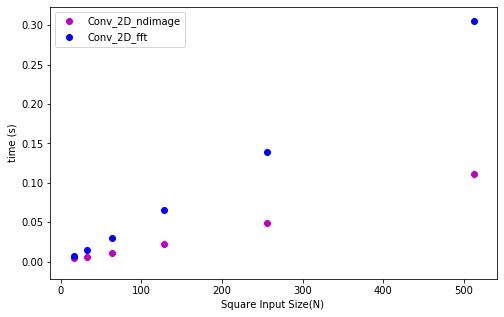

In [113]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy import signal
from timeit import Timer

#read number of rows and columns and store them in M,N
row = int(input("Enter number of rows for the input Matrix:"))
col = int(input("Enter number of columns for the input Matrix:"))
kernel=[1,0,-1]

# Assumptions:
# Output size of row convolution and column convolution is the same size as input M i.e. row by col 
# (only middle values after convolution are returned). Borders are padded with zeros where necessary.

def convolve_2D_ndimage(row,col, kernel):
    # initialize M with random positive values. M_dtype =uint8 (0-255)
    M = np.random.randint(255, size=(row,col),dtype='uint8')
    
    #initialize row convolution output and column convolution output
    Dx = np.zeros((row, col),dtype='int32')
    Dy = np.zeros((row, col),dtype='int32')
    
    for i in range(row):
        Dx[i,:] = ndimage.convolve(M[i,:].astype('int32'), kernel, mode='constant', cval=0.0)
    for i in range(col):
        Dy[:,i] = ndimage.convolve(M[:,i].astype('int32'), np.transpose(kernel), mode='constant', cval=0.0)
    return Dx,Dy

def convolve_2D_fft(row,col, kernel):
    # initialize M with random positive values
    M = np.random.randint(255, size=(row,col),dtype='uint8')
    
    #initialize row convolution output and column convolution output
    Dx = np.zeros((row, col),dtype='int64')
    Dy = np.zeros((row, col),dtype='int64')
    
    for i in range(row):
        Dx[i,:] = signal.fftconvolve(M[i,:].astype('int32'), kernel, 'same')
    for i in range(col):
        Dy[:,i] = signal.fftconvolve(M[:,i].astype('int32'), np.transpose(kernel), 'same')
    return Dx,Dy

def print_min_max(Dx,Dy):
    print("Dx Min:",np.min(Dx),", Dx Max:",np.max(Dx))
    print("Dy Min:",np.min(Dy),", Dy Max:",np.max(Dy))

# Optional: Testing different methods for time efficieny
def time_efficiency_test():
    c_2d, fft=[],[]
    Ns = 2**np.arange(4, 10)
    num=5
    for N in Ns:
        t = Timer(lambda: convolve_2D_ndimage(N, N, kernel))
        c_2d.append(t.timeit(number=num))

        t = Timer(lambda: convolve_2D_fft(N, N, kernel))
        fft.append(t.timeit(number=num))
    fig , ax = plt.subplots(figsize=(8, 5))
    ax.scatter(Ns, c_2d[:len(Ns)], c='m', label='Conv_2D_ndimage')
    ax.scatter(Ns, fft[:len(Ns)], c='b', label='Conv_2D_fft')
    ax.set_xlabel('Square Input Size(N) ')
    ax.set_ylabel('time (s)')
    ax.legend();
    
#Print test results:
time_efficiency_test()

#CONCLUSION: Most Optimized Function: conv_2D_ndimage()
print("Most Optimized Function: conv_2D_ndimage()")
#Print time taken to run the convole_2D code
T = Timer(lambda: convolve_2D_ndimage(row, col, kernel))
print("Time taken to compute Dx and Dy Matrices:",T.timeit(number=1),"seconds")

#Print min and max values of Dx and Dy
Dx,Dy= convolve_2D_ndimage(row, col, kernel)
print_min_max(Dx,Dy)

